Project: ICRC Collaboration. CAS Applied Data Sciencem Module 1. University of Bern

# Collaborative work at ICRC
## Descriptive statistics on collaborative spaces

### 1. Descriptive Statistics
In the part below, we will describe the collaborative subset of data more in detail.
We focus on the collaborative subset because, as we want, we want to analyse how people work with the documents that can be edited

In [1]:
#first, we import the necessary modules
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
# we set pandas to show as short decimal numbers, as we dont want excessive long strings that bring no added value:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#We import the data
df = pd.read_csv ('CollabCleanSPdata.csv')
#we have a quick look at it
df

,Unnamed: 0,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,1,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,3,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,4,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,5,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,6,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
...,...,...,...,...,...,...,...,...,...
106681,209760,Worksheet,FAD,0.090,144,11.530,2020-01-07,2020-09-04,241 days
106682,209761,Worksheet,FAD,1.290,136,410.040,2019-12-19,2020-09-04,260 days
106683,209762,Worksheet,FAD,0.050,211,9.270,2020-05-25,2020-09-04,102 days
106684,209766,Worksheet,FAD,0.620,128,71.460,2020-02-05,2020-09-04,212 days


In [3]:
#we delete the "unnamed" column, that has given us the index of the source dataframe
del df['Unnamed: 0']

In [4]:
df.head(10)

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
5,Textual,ASSIST,0.230,1,0.900,2014-08-11,2014-08-20,9 days
6,Textual,ASSIST,0.090,1,0.270,2014-08-11,2014-08-20,9 days
7,Worksheet,ASSIST,1.450,1,4.350,2014-08-13,2014-08-20,7 days
8,Worksheet,ASSIST,1.450,1,2.900,2014-08-13,2014-08-20,7 days
9,Textual,ASSIST,0.160,1,0.160,2014-08-18,2014-08-20,2 days


In [5]:
#we look also at the type of data we have, to see if we can work with it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106686 entries, 0 to 106685
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   File_type      106686 non-null  object 
 1   Service        106686 non-null  object 
 2   SizeMB         106686 non-null  float64
 3   Version        106686 non-null  int64  
 4   Total_sizeMB   106686 non-null  float64
 5   Created        106686 non-null  object 
 6   Last_modified  106686 non-null  object 
 7   Working_days   106686 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ MB


In [6]:
#Created and last modified are dates, not objects; working days should be a time delta, not an object. We correct this:
df['Created'] = pd.to_datetime(df['Created'])
df['Last_modified'] = pd.to_datetime(df['Last_modified'])
df['Working_days'] = pd.to_timedelta(df['Working_days'])
df.head(10)

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
5,Textual,ASSIST,0.230,1,0.900,2014-08-11,2014-08-20,9 days
6,Textual,ASSIST,0.090,1,0.270,2014-08-11,2014-08-20,9 days
7,Worksheet,ASSIST,1.450,1,4.350,2014-08-13,2014-08-20,7 days
8,Worksheet,ASSIST,1.450,1,2.900,2014-08-13,2014-08-20,7 days
9,Textual,ASSIST,0.160,1,0.160,2014-08-18,2014-08-20,2 days


In [7]:
#and we check that it worked.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106686 entries, 0 to 106685
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   File_type      106686 non-null  object         
 1   Service        106686 non-null  object         
 2   SizeMB         106686 non-null  float64        
 3   Version        106686 non-null  int64          
 4   Total_sizeMB   106686 non-null  float64        
 5   Created        106686 non-null  datetime64[ns] 
 6   Last_modified  106686 non-null  datetime64[ns] 
 7   Working_days   106686 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 6.5+ MB


In [8]:
#then, we extract some basic statistics
df.describe()

,SizeMB,Version,Total_sizeMB,Working_days
count,106686.000,106686.000,106686.000,106686
mean,1.370,2.716,4.750,82 days 09:33:27.423654461
std,7.386,8.548,44.035,170 days 06:26:18.189711008
min,0.000,1.000,0.000,0 days 00:00:00
25%,0.040,1.000,0.070,0 days 00:00:00
50%,0.070,1.000,0.160,0 days 00:00:00
75%,0.270,2.000,0.700,59 days 00:00:00
max,249.410,511.000,5485.640,1739 days 00:00:00


Here we see some interesting facts already:
- Standard deviation is quite high in many values
- Our Version distribution seems not to be normal. We saw that in the previous module
We do a quick check on the kurtosis and skewness of all values

In [9]:
df.kurt()

SizeMB          328.303
Version        1167.858
Total_sizeMB   4110.512
dtype: float64

In [10]:
df.skew()

SizeMB         14.868
Version        27.013
Total_sizeMB   49.952
dtype: float64

In [11]:
df.var()

SizeMB           54.560
Version          73.072
Total_sizeMB   1939.093
dtype: float64

Some other descriptive statistics:


In [12]:
#we calculate the correlation and covariance matrix, per file type
df[df['File_type']=='Textual'].cov()

,SizeMB,Version,Total_sizeMB
SizeMB,7.361,0.088,27.889
Version,0.088,27.353,12.856
Total_sizeMB,27.889,12.856,356.874


In [13]:
df[df['File_type']=='Textual'].corr()

,SizeMB,Version,Total_sizeMB
SizeMB,1.000,0.006,0.544
Version,0.006,1.000,0.130
Total_sizeMB,0.544,0.130,1.000


### 2. Descriptive plotting:
Here we will run a series of graphics to have a first overview of our data. In particular:
- We will do a scatter plow of all document Versions together, in relation with the total size
- xxxxx CODE BELOW IS JUST EXPERIMENTING

In [ ]:
#scatter plow
ax =collab_df.plot(x='Version', y='Total_sizeMB', marker="o" , linestyle='None', figsize=(8,6))
plt.legend()
plt.show()

In [ ]:
# we do the same in relation with the file type and the service
#sns.barplot(data = collab_df, x='Version', y='Total_sizeMB', hue='Service')
plt.figure(figsize=(8,20))
sns.violinplot(data=df, y='Version', x='File_type');

In [ ]:
sns.barplot(data = df, x='Service', y='Version', hue='File_type')

In [ ]:
#we do a scatterflow
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="Total_sizeMB", y="Version", hue="Service")

In [ ]:
#and the same with file types
plt.figure(figsize=(15,15))
sns.scatterplot(data=df, x="Total_sizeMB", y="Version", hue="File_type")

In [ ]:
#Work on this graph!!!
collab_df['Working_days'].dt.days.hist(bins = 60)

In [ ]:
# We want to see if there is a relation in the working days and the number of versions
ax =df.plot(x='Version', y='Working_days', marker="o" , linestyle='None', figsize=(12,12))
plt.legend()
plt.show()

In [ ]:
#we extract the data without outlyers
df = df_base[(df_base.Version <= 100) & (df_base.Total_sizeMB <= 1000)].copy()
df

In [ ]:
#scatter plow
ax =df.plot(x='Version', y='Total_sizeMB', marker="o" , linestyle='None', figsize=(12,12))
plt.legend()
plt.show()

In [ ]:
ax =df.plot(x='Version', y='Total_sizeMB', marker="o" , linestyle='None', figsize=(12,12))
plt.legend()
plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[df['File_type']=='Textual'], alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

### 3. Answering our question:
We want to assess how people collaborate at ICRC, in general, and by type of service. As a reminder, we have the following services:
- FAD (Finance and Administration) responsible for finances
- REM (Ressources Mobilisation) responsible for fundraising
- PROT (Protection) responsible for humanitarian protection response
- ASSIST (Assistance) responsible for humanitarian assistance response
- PRES (Presidency) responsible for the leadership of the institution.
The first two services (FAD and REM) are administrative services. PROT and ASSIST are operational services where the last one is a political body.

For what we have seen in our graphics, our distribution of Version history seems to be not normal, probably a poisson distribution. We can check that this is the case and then use a p-value to assess the probability of reachen a given version number. The higher the probability, the higher the collaboration among colleagues.

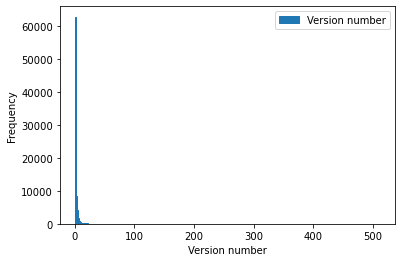

In [14]:
#we plot our version histogram to superpose on it the shape of a poisson distribution
#We saw above that the versions range from 1 to 511. Let's represent all of them:
ax = df['Version'].plot(bins=511,range=(1,511), kind="hist",fill=True,histtype='step',label='Version number')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

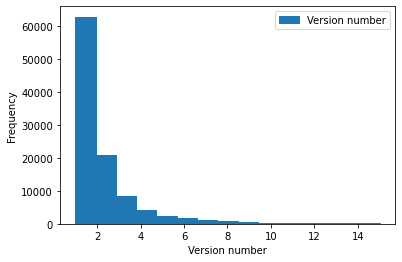

In [15]:
#As we saw before, most values are at the early versions. 
#Let's focus at those first values and represent only the 15 most common occurences:
ax = df['Version'].plot(bins=15,range=(1,15), kind="hist",fill=True,histtype='step',label='Version number')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

In [16]:
#We will focus our analysis in the first 15 version numbers, creating a specific dataframe for them:
df_lowV = df[(df.Version <= 15)].copy()
df_lowV

,File_type,Service,SizeMB,Version,Total_sizeMB,Created,Last_modified,Working_days
0,Textual,ASSIST,0.120,1,0.240,2014-08-20,2014-08-20,0 days
1,Textual,ASSIST,0.530,1,0.530,2014-08-20,2014-08-20,0 days
2,Textual,ASSIST,0.260,1,0.510,2014-08-18,2014-08-20,2 days
3,Textual,ASSIST,0.090,1,0.530,2014-08-11,2014-08-20,9 days
4,Textual,ASSIST,0.170,1,0.520,2014-08-11,2014-08-20,9 days
...,...,...,...,...,...,...,...,...
106675,Presentation,FAD,1.460,1,1.460,2020-09-04,2020-09-04,0 days
106676,Worksheet,FAD,0.070,2,0.220,2020-09-04,2020-09-04,0 days
106678,Worksheet,FAD,1.310,9,11.180,2020-08-14,2020-09-04,21 days
106680,Worksheet,FAD,0.050,1,0.050,2020-09-04,2020-09-04,0 days


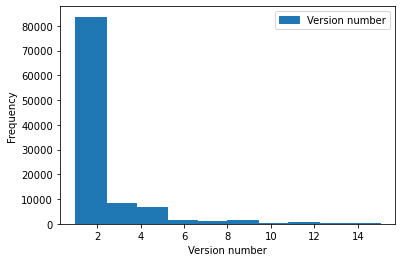

In [17]:
#...and we plot it again:
ax = df_lowV['Version'].plot(kind="hist",fill=True,histtype='step',label='Version number')
ax.set_xlabel('Version number')
plt.legend()
plt.show()

In [18]:
#I get the basic statistical information from my new dataframe:
df_lowV.describe()

,SizeMB,Version,Total_sizeMB,Working_days
count,104694.000,104694.000,104694.000,104694
mean,1.377,1.997,3.983,80 days 13:19:15.160754199
std,7.439,1.952,29.133,168 days 07:54:27.678304978
min,0.000,1.000,0.000,0 days 00:00:00
25%,0.040,1.000,0.060,0 days 00:00:00
50%,0.070,1.000,0.160,0 days 00:00:00
75%,0.270,2.000,0.630,56 days 00:00:00
max,249.410,15.000,2964.450,1739 days 00:00:00


In [19]:
#graphically, it looks like a poisson distribution. 
#Let's check that Variance = 1.997 (our mean) to see if we are in such a case:
df_lowV.var()

SizeMB          55.336
Version          3.809
Total_sizeMB   848.738
dtype: float64

We have discovered that our dataframe is not poisson distributed. We cannot use the poisson.pmf formula existing in scipy to calculate our probability

In [20]:
#I calculate the probability of getting a version in my dataframe
df['Pro'] = df.Version.map(df.Version.value_counts(normalize=True)).copy()

In [21]:
#I get rid of the duplicates to get the probability of each version
df_Pro=df[['Version', 'Pro']].drop_duplicates(subset=['Version']).copy()
df_Pro

,Version,Pro
0,1,0.589
12,2,0.196
91,4,0.041
96,6,0.016
97,3,0.078
...,...,...
106661,238,0.000
106672,159,0.000
106677,156,0.000
106679,136,0.000


In [25]:
#I sort the values to have the versions in order
df_Pro.sort_values(by=['Version'], inplace=True)
df_Pro

,Version,Pro
0,1,0.589
12,2,0.196
97,3,0.078
91,4,0.041
185,5,0.024
...,...,...
21703,462,0.000
106345,473,0.000
76932,501,0.000
92328,507,0.000


<AxesSubplot:xlabel='Version'>

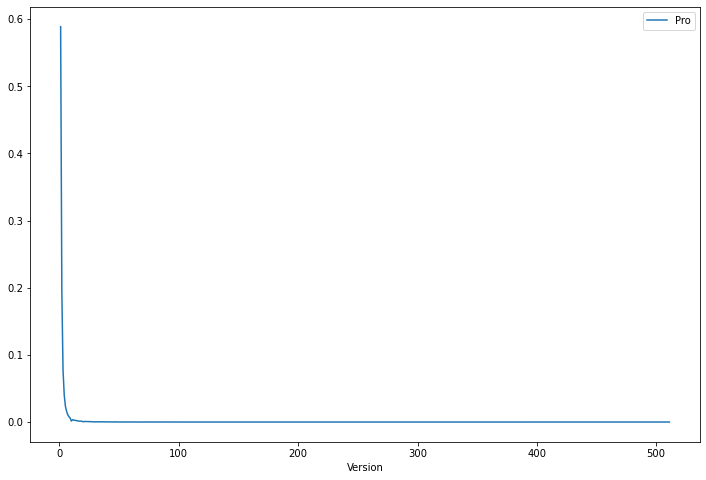

In [26]:
#...and I represent it graphically
df_Pro.plot(x='Version', y='Pro', figsize=(12,8))

<AxesSubplot:xlabel='Version'>

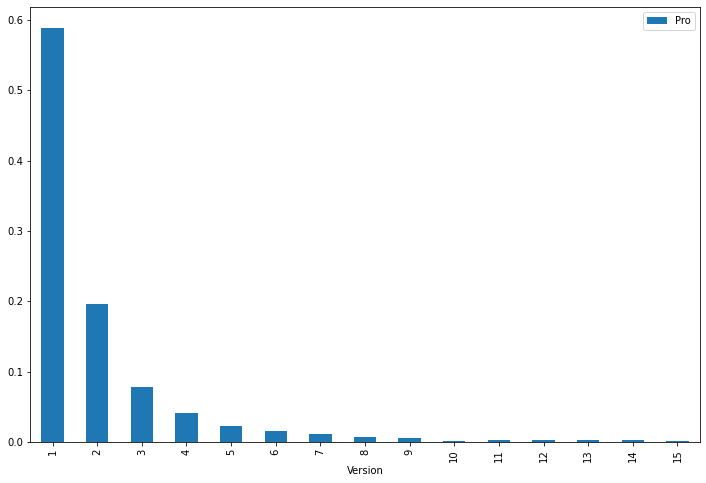

In [27]:
#I do the same graphic, but only with the first 15 Versions
df_lowP = df_Pro[(df_Pro.Version <= 15)].copy()
#df_lowP
df_lowP.plot(x='Version', y='Pro', kind='bar',figsize=(12,8))

## From here onwards:
- I will calculate the probability of having more than version 3 (1-the cumulated values) 
- I will do the same exercice per service, or at least for kind of service (administrative, operational political)
- I will do boxplots per service (to see how they compare)
- and finally, I will trz to run a mann-withney test by the two kinds of service (administrative & Operational to see if we can deduce they work differently (Come from different samples) or no

In [ ]:
#CODE BELOW IS JUST TESTING

In [ ]:
df_Textual = df[df['File_type']=='Textual']
df_Presentation = df[df['File_type']=='Presentation']

plt.subplot(221)
df_Textual['Version'].plot(bins = 100,kind="hist",fill=False,histtype='step',title='Textual documents', label="Version")

ax_s.set_xlabel('MB')
ax_s.set_ylabel('A.U.')
plt.legend()

plt.subplot(222)
df_Presentation['Version'].plot(bins = 100, kind="hist",fill=False,histtype='step',title='Ppt documents', label="Version")

ax_s.set_xlabel('MB')
ax_s.set_ylabel('A.U.')
plt.legend()

plt.show()

In [ ]:
from scipy.stats import norm
mean  = df_Textual['Total_sizeMB'].mean()
width = df_Textual['Total_sizeMB'].std()
print(mean,width)
# Create figure and axis
fig, ax = plt.subplots(1,1)
# Create 10000 x values and plot the normal pdf for these values
x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 10000)
x = np.linspace(3,7,80)
ax.plot(x, norm.pdf(x,mean,width),'b-', lw=2, label='Normed pdf')
#pdf = probability density function
df_Textual['Total_sizeMB'].plot(bins=100, kind="hist",fill=False,histtype='step',title='Textual Documents', label="total size", density="True")
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
TotalSize = df_Textual['Total_sizeMB']
Size  = df_Textual['SizeMB']
slope, intercept, r_value, p_value, std_err = stats.linregress(TotalSize,Size)
print (slope, intercept, std_err)

In [ ]:
print ('Gradient = %1.2f +- %1.2f' % (slope,std_err))

In [ ]:
ax = df_Textual.plot(x='Total_sizeMB',y='SizeMB',kind="scatter",c='c')
plt.plot(TotalSize, intercept + slope*TotalSize, 'b', label='Fitted treated line')
plt.show()